# Wine Project - Finding Drivers Of Wine Quality

# Goal

- Identify Key Features: Determine the features within the dataset that exhibit strong relationship with quality of wine.
- Build Predictive Model: Develop a model that can accurately predict wine quality based on the selected features utilizing clusters

- Share Insights: Communicate the findings and model insights to the California Wine Institute data science team   supply chain marketing. for further analysis and decision-making.



# Import

In [3]:
#import libraries
import wrangle
import explore
import evaluate
import pandas as pd
import seaborn as sns
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings('ignore')

# Acquire


- Data acquired from Data.World Wine Quality Dataset(https://data.world/food/wine-quality/activity)
- Data set has 13 columns and 6,497 rows before cleaning
- Each row represents a unique wine
- Each column represents wine feature


#  Prepare

### Prepare Actions:

- Renamed columns to promote readability
- Checked for nulls in the data, there are no nulls
- Data type didin't need adjustments
- Outliers  removed
- Encode categorical variables
- Split data into train, validate and test (approx. 50/30/20)
- Added column strain , which identifies if the wine is red or white

- Scaled appropriate features



## Data Dictionary  



### Data Used
---

| Attribute           | Definition                                      | Data Type |
|---------------------|-------------------------------------------------|-----------|
| fixed acidity       | Amount of non-volatile acids in a substance    | float     |
| volatile acidity    | Amount of volatile acids in a substance        | float     |
| citric acid         | Amount of citric acid in a substance           | float     |
| residual sugar      | Amount of residual sugar in a substance        | float     |
| chlorides           | Concentration of chlorides in a substance      | float     |
| free sulfur dioxide | Level of free sulfur dioxide in a substance    | float     |
| total sulfur dioxide| Total sulfur dioxide content in a substance    | float     |
| density             | The density of a substance                     | float     |
| pH                  | The pH level of a substance                    | float     |
| sulphates           | Amount of sulfates in a substance              | float     |
| proof               | Twice the percentage of alcohol by volume      | float     |
| quality             | The quality rating of a substance              | float     |
| strain              | Type of wine                                   | object    |

-  This data dictionary provides a clear description of each attribute, its definition, and the data type associated with each attribute. The data types are represented as "float" for numerical values and "object" for categorical values.

## Quick Data Preview

In [4]:
# split data into train, validate and test
train, validate, test = wrangle.wrangle_zillow()

In [5]:
# this previews the training data
train.head()

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
52422,3.0,3.0,1774.0,6037.0,1949.0,796324.0,1,0,0
37841,3.0,2.0,1575.0,6037.0,1977.0,138035.0,1,0,0
31409,4.0,2.0,1918.0,6059.0,1952.0,521000.0,0,1,0
3753,3.0,2.0,967.0,6037.0,1952.0,428000.0,1,0,0
24421,3.0,2.5,1281.0,6059.0,1983.0,257831.0,0,1,0


In [6]:
#splits into scaled data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [7]:
# previews train scaled data
train_scaled.head()

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
52422,0.0,0.50,0.254108,6037.0,0.422414,796324.0,1,0,0
37841,0.0,0.00,0.208054,6037.0,0.663793,138035.0,1,0,0
31409,0.5,0.00,0.287433,6059.0,0.448276,521000.0,0,1,0
3753,0.0,0.00,0.067346,6037.0,0.448276,428000.0,1,0,0
24421,0.0,0.25,0.140014,6059.0,0.715517,257831.0,0,1,0


## Data Summary

In [8]:
# provides a quick description of the data
train.describe()

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,2.000100e+04,20001.000000,20001.000000,20001.000000
mean,3.554422,2.485126,2007.005850,6050.757212,1968.529024,4.981890e+05,0.606770,0.295035,0.098195
std,0.637613,0.594614,684.713377,22.164770,20.592003,4.338768e+05,0.488479,0.456070,0.297586
min,3.000000,2.000000,676.000000,6037.000000,1900.000000,5.000100e+04,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1479.000000,6037.000000,1955.000000,2.227410e+05,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1849.000000,6037.000000,1965.000000,4.080000e+05,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2404.000000,6059.000000,1984.000000,6.358000e+05,1.000000,1.000000,0.000000
max,5.000000,4.000000,4997.000000,6111.000000,2016.000000,5.000000e+06,1.000000,1.000000,1.000000


# Explore

In [9]:
# assign data frame to df variable
df = train

In [10]:
print('maximum home value in data is',train.tax_value.max())
print('minimum home value in data is', train.tax_value.min())

maximum home value in data is 5000000.0
minimum home value in data is 50001.0


## Is bedroom count correlated with home value

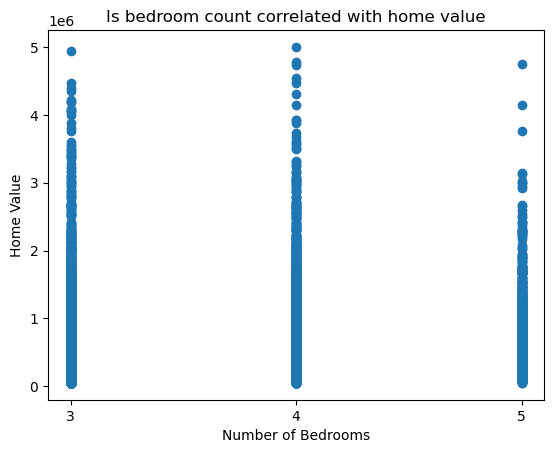

In [11]:
#this creates a scatterplot
plt.scatter(train.bedroom_count, train.tax_value)
plt.title("Is bedroom count correlated with home value")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Home Value")
plt.xticks([3, 4, 5])
plt.show()

 - Visually no apparent correlation between the number of bedrooms and home value
 

#### I will now use a Pearsons R test to investigate whether number of bedrooms and the home value are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Number of bedrooms and Tax Value are not correlated.
#### Ha: Number of bedrooms and Tax Value are correlated.

In [12]:
# sets alpha
alpha = 0.05
bedroom_count = train['bedroom_count']
tax_value = train['tax_value']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(bedroom_count, tax_value)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.12600087159123213
p-value:  1.4140299191343556e-71


I can reject the null hypothesis which now means the number of bedrooms and Tax Value are correlated.

## Is bathroom count correlated with home value

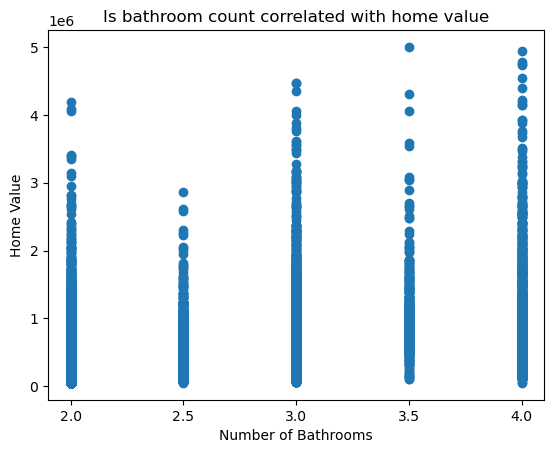

In [13]:
#creates a scatter plot
plt.scatter(train.bathroom_count, train.tax_value)
plt.title("Is bathroom count correlated with home value")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Home Value")
plt.xticks([2,2.5, 3,3.5, 4])
plt.show()

 - Visually, although moderate, there seems to be a correlation between the number of bathrooms and the home value as for each whole bath, the more bathrooms the higher the value
 

#### I will now use a Pearsons R test to investigate whether number of bathrooms and the home value are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Number of bathrooms and Tax Value are not correlated.
#### Ha: Number of bathrooms and Tax Value are correlated.

In [14]:
#sets location of column to variable name
bathroom_count = train['bathroom_count']
tax_value = train['tax_value']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(bathroom_count, tax_value)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.4075733892089148
p-value:  0.0


In [15]:
#checks if pvalue is less than alpha
p_value < alpha

True

I can reject the null hypothesis which now means the number of bathrooms and Tax Value are correlated.

## Is caclulated square feet correlated with home value

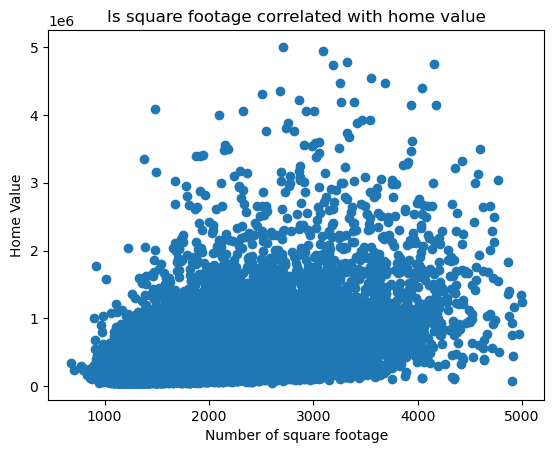

In [16]:
#creates a scatterplot to represent the data
plt.scatter(train.calc_sqr_feet, train.tax_value)
plt.title("Is square footage correlated with home value")
plt.xlabel("Number of square footage")
plt.ylabel("Home Value")
plt.show()

 - There appears to be a moderate correlation between calculated square feet and home value.
 

#### I will now use a Pearsons R test to investigate whether square footage and the home value are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Square feet and Tax Value are not correlated.
#### Ha: Square feet and Tax Value are correlated.

In [17]:
calc_sqr_feet = train['calc_sqr_feet']
tax_value = train['tax_value']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(calc_sqr_feet, tax_value)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.48382078435308545
p-value:  0.0


In [18]:
p_value < alpha

True

I can reject the null hypothesis which now means Square footage and Tax Value are correlated.

## Is the year the home was built correlate with home value

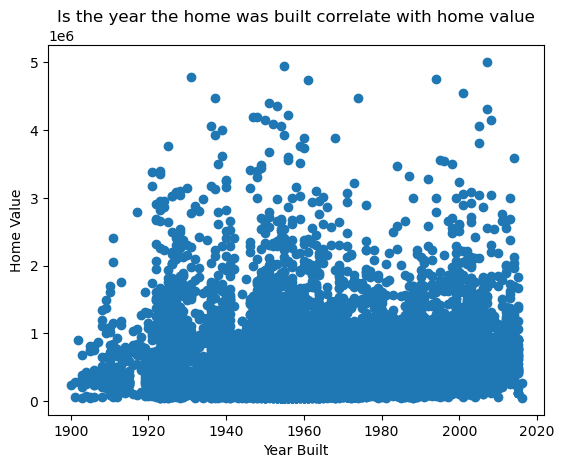

In [19]:
#creates a scatterplot to represent the data
plt.scatter(train.yearbuilt, train.tax_value)
plt.title("Is the year the home was built correlate with home value")
plt.xlabel("Year Built")
plt.ylabel("Home Value")
plt.show()

 - The year built seems to raise the home value as the years increase, more so from 1900 to 1940
 

#### I will now use a Pearsons R test to investigate whether year built and the home value are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Year Built and Tax Value are not correlated.
#### Ha: Year Built and Tax Value are correlated.

In [20]:
yearbuilt = train['yearbuilt']
tax_value = train['tax_value']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(yearbuilt, tax_value)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.07073110942105776
p-value:  1.3088412810886062e-23


In [21]:
#checks if pvalue is less than alpha
p_value < alpha

True

I can reject the null hypothesis which now means Year Built and Tax Value are correlated.

## Does county code affect the home's value

#### Homes in data are all located in California in these counties : Los Angeles County, Orange County, and Ventura County 

county codes were researched and found from the following source "https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county"

| County Code | County Name         | State       |
| ----------- | ------------------ | ----------- |
| 6059        | Orange County       | California  |
| 6037        | Los Angeles County | California  |
| 6111        | Ventura County      | California  |

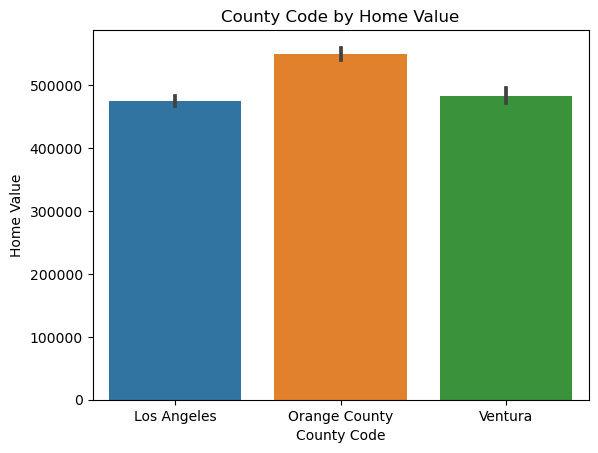

In [22]:
#creates a barplot to represent data
sns.barplot(x='county_code', y='tax_value', data=train)
plt.title("County Code by Home Value")
plt.xlabel("County Code")
plt.ylabel("Home Value")
plt.xticks(ticks=[0, 1, 2], labels=['Los Angeles', 'Orange County', 'Ventura'])
plt.show()


 - The county code seems to be associated with home value as the average for Los Angeles and Ventura being around avg of 450,000, while Orange County is around 530,000.

#### I will now use a independent t test to investigate whether county code and the home value.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: County Code and Tax Value are not associated.
#### Ha: County Code and Tax Value are associated.

In [23]:

county_code = train['county_code']
tax_value = train['tax_value']
#runs a ttest
t_statistic, p_value = ttest_ind(county_code, tax_value)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -160.4155899143897
P-value: 0.0


In [24]:
p_value < alpha

True

I can reject the null hypothesis which now means County Code and Tax Value are associated.

## Exploration Summary
County code, square footage, year built, bathroom count and bedroom count were each found to be drivers of "tax_value"

- Revisisting data for more reasonable number features in future especially with stronger correlations

* All columns were found to be drivers of the home's value

## Features moving forward for modeling

- calc_sqr_feet - (relationship to the home's value is statistically significant)

- bathroom_count - (relationship to the home's value is statistically significant)

- bedroom_count -  (relationship to the home's value is statistically significant)

- yearbuilt -  (relationship to the home's value is statistically significant)

- county_code -  (relationship to the home's value is statistically significant)



## Features not moving forward for modeling

No features left out for modeling

## Modeling

- I will use Root Mean Square Error(RMSE) as my evaluation metric

- by guessing a home's value for every home, one could achieve an RMSE of about $434,000. 

- $434,000 will be the baseline RMSE I use for this project
- I will be evaluating models developed using four different model types.
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data
- Data for split will be scaled and county_code will be dropped after turned into dummies.

In [25]:
#code below sets x and y train/validate to scaled data
target = 'tax_value'
drop_col = ['county_code']

X_train = train_scaled.drop(columns=[target] + drop_col)
y_train = train_scaled[target]

X_validate = validate_scaled.drop(columns=[target] + drop_col)
y_validate = validate_scaled[target]

X_test = test_scaled.drop(columns=[target] + drop_col)
y_test = test_scaled[target]

In [26]:
#assigns dataframe to variable
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [27]:
value_pred_mean = y_train.tax_value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

### Baseline

In [28]:
#below code creates baseline and dataframe to hold the values
model_rmse = []


rmse_train_mu = mean_squared_error(y_train.tax_value, y_train.value_pred_mean) **.5

rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean) **.5

model_rmse.append({
    'model': 'Baseline',
'Training/In-Sample': rmse_train_mu, 
'Validation/Out-of-Sample': rmse_validate_mu,
'Difference':  rmse_validate_mu - rmse_train_mu,

})
pd.DataFrame(model_rmse)

,model,Training/In-Sample,Validation/Out-of-Sample,Difference
0,Baseline,433865.919366,428222.247788,-5643.671579


### LinearRegression (OLS)

In [29]:


# MAKE THE THING: create the model object
OLSmodel = LinearRegression()

#1. FIT THE THING: fit the model to training data

OLSmodel.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'OLS',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

,model,Training/In-Sample,Validation/Out-of-Sample,Difference
0,Baseline,433865.919366,428222.247788,-5643.671579
1,OLS,369926.630000,364517.280000,-5409.350000


### LassoLars

In [30]:

# MAKE THE THING: create the model object
lars = LassoLars(alpha = 0.01)

#1. FIT THE THING: fit the model to training data

lars.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** .5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'LassoLars',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

,model,Training/In-Sample,Validation/Out-of-Sample,Difference
0,Baseline,433865.919366,428222.247788,-5643.671579
1,OLS,369926.630000,364517.280000,-5409.350000
2,LassoLars,369926.650000,364515.700000,-5410.950000


### TweedieRegressor (GLM:Generalized Linear Model)

In [31]:


# MAKE THE THING: create the model object
glm = TweedieRegressor(power = 2, alpha = 0.2)

glm.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** .5


rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
'model': 'GLM',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

,model,Training/In-Sample,Validation/Out-of-Sample,Difference
0,Baseline,433865.919366,428222.247788,-5643.671579
1,OLS,369926.630000,364517.280000,-5409.350000
2,LassoLars,369926.650000,364515.700000,-5410.950000
3,GLM,408563.890000,403213.880000,-5350.010000


### Ploynomial Regression

In [32]:
 

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.tax_value)

# Make predictions on training set
y_train['value_pred_poly'] = poly_reg.predict(X_train_poly)
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_poly) ** 0.5

# Make predictions on validation set
y_validate['value_pred_poly'] = poly_reg.predict(X_validate_poly)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_poly) ** 0.5

rmse_train = round(rmse_train, 2)
rmse_validate = round(rmse_validate, 2)
difference = round(rmse_validate - rmse_train, 2)


model_rmse.append({
    'model': 'Poly',
'Training/In-Sample': rmse_train, 
'Validation/Out-of-Sample': rmse_validate,
'Difference':  rmse_validate - rmse_train,

})
pd.DataFrame(model_rmse)

,model,Training/In-Sample,Validation/Out-of-Sample,Difference
0,Baseline,433865.919366,428222.247788,-5643.671579
1,OLS,369926.630000,364517.280000,-5409.350000
2,LassoLars,369926.650000,364515.700000,-5410.950000
3,GLM,408563.890000,403213.880000,-5350.010000
4,Poly,359127.930000,354205.710000,-4922.220000


# Comparing Models

- All models outperformed baseline
- LassoLars and Linear Regression models had a slightly lower error reduction at 15% better than baseline.
- The TweedieRegressor model barely outperformed baseline by 6%.
- Considering all models, as they did all beat baseline, Polynomial Regression model outperformed baseline by 17% which was the highest in error reduction.
- I will be using my polynomial regression model to run on test as it performed the best for seen and unseen data with the lowest RMSE

In [33]:
#code runs test on polynomial regression
X_test_poly = poly.transform(X_test)

y_test_pred = poly_reg.predict(X_test_poly)

rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"RMSE on Test Set: {rmse_test}")

RMSE on Test Set: 357684.121153635


### Modeling Summary
- All models performed better than baseline
- RMSE on POLY Test Set beats baselines RMSE train and RMSE validate by approximately 76,000  dollars less in error which equates to 18% error reduction from baseline
- Polynomial was selected as the final model and had a test RMSE of 358,000 dollars

## Conclusions

### Exploration

- bathroom count and square footage had the strongest correlation with the target
- county code, bedroom count, year built had a very weak correlation with the target
- county code had the weakest relation to the home's value
- square footage had the strongest correlation to home's value

## Modeling

#### The final model succeeded in outperforming the baseline RMSE by 18%. 



## Recommendations

#### Utilize the Polynomial model made in order to reduce error in predicting the home's value by about 76,000 dollars

## Next Steps

- Further explore columns in the data set to further reduce error
- Look for more features that may have a stronger correlation than current features given to the model
- To find a prediction with less error it may be a good idea to find the property tax in 2017 for the cities where the home is located and create a feature that approximates the homes property tax using the target feature data and the tax rate for that area.